In [48]:
import pandas as pd
import numpy as np

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

#combine train and test data to one dataframe
data = pd.concat([train, test], ignore_index=True)

data.head()


,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0.0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0.0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0.0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0.0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0.0


In [49]:

#Quick analysis of data shows that there are some values we do not care about, like id, Custommerid, Surname, Tenure, IsActiveMember and Exited
#lets drop these columns.

data = data.drop(['id', 'CustomerId', 'Surname', 'Tenure', 'IsActiveMember', 'Exited'], axis=1)

data

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,HasCrCard,EstimatedSalary
0,668,France,Male,33.0,0.00,2,1.0,181449.97
1,627,France,Male,33.0,0.00,2,1.0,49503.50
2,678,France,Male,40.0,0.00,2,1.0,184866.69
3,581,France,Male,34.0,148882.54,1,1.0,84560.88
4,716,Spain,Male,33.0,0.00,2,1.0,15068.83
...,...,...,...,...,...,...,...,...
275052,570,Spain,Male,29.0,116099.82,1,1.0,148087.62
275053,575,France,Female,36.0,178032.53,1,1.0,42181.68
275054,712,France,Male,31.0,0.00,2,1.0,16287.38
275055,709,France,Female,32.0,0.00,1,1.0,158816.58


In [50]:

#lets check for missing values

data.isnull().sum()


CreditScore        0
Geography          0
Gender             0
Age                0
Balance            0
NumOfProducts      0
HasCrCard          0
EstimatedSalary    0
dtype: int64

In [ ]:
#there are no missing values in the data, so we can proceed to the next step

In [51]:

#lets check the unique values in the data

for column in data.columns:
    print(column, data[column].nunique())
    
# This shows that we only have data for 3 countries, this is unfortunate as we had hoped for more countries to be represented in the data


CreditScore 458
Geography 3
Gender 2
Age 74
Balance 43875
NumOfProducts 4
HasCrCard 2
EstimatedSalary 79868



Medians:
CreditScore           659.00
Age                    37.00
Balance                 0.00
NumOfProducts           2.00
HasCrCard               1.00
EstimatedSalary    117848.09
dtype: float64


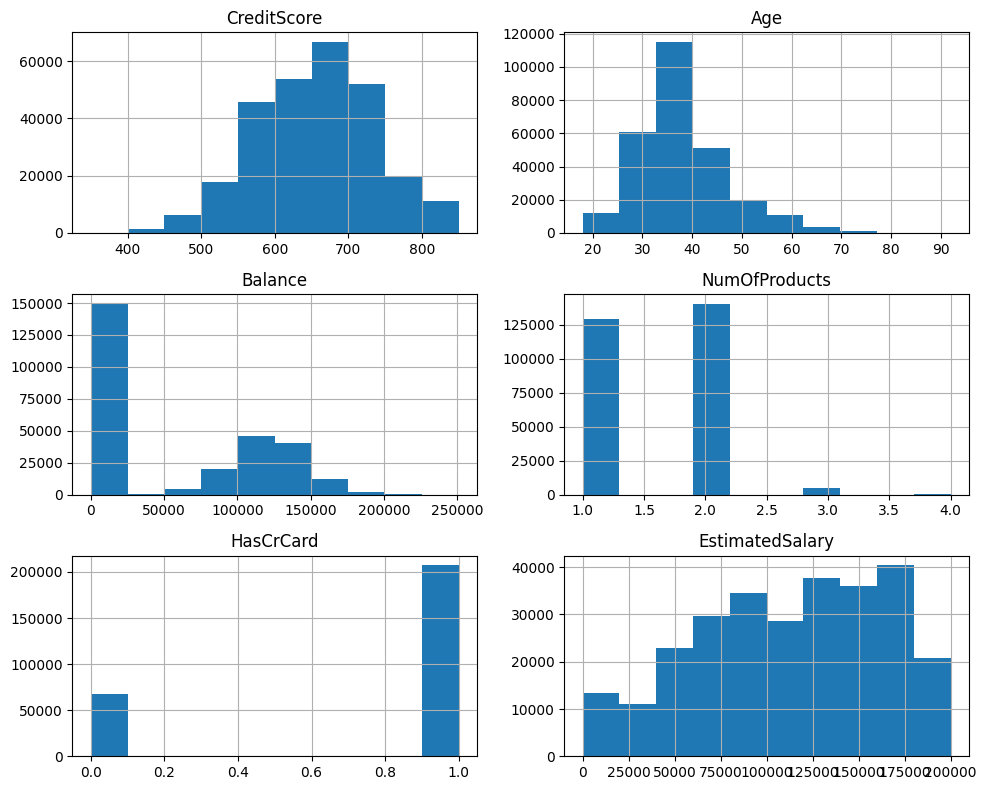

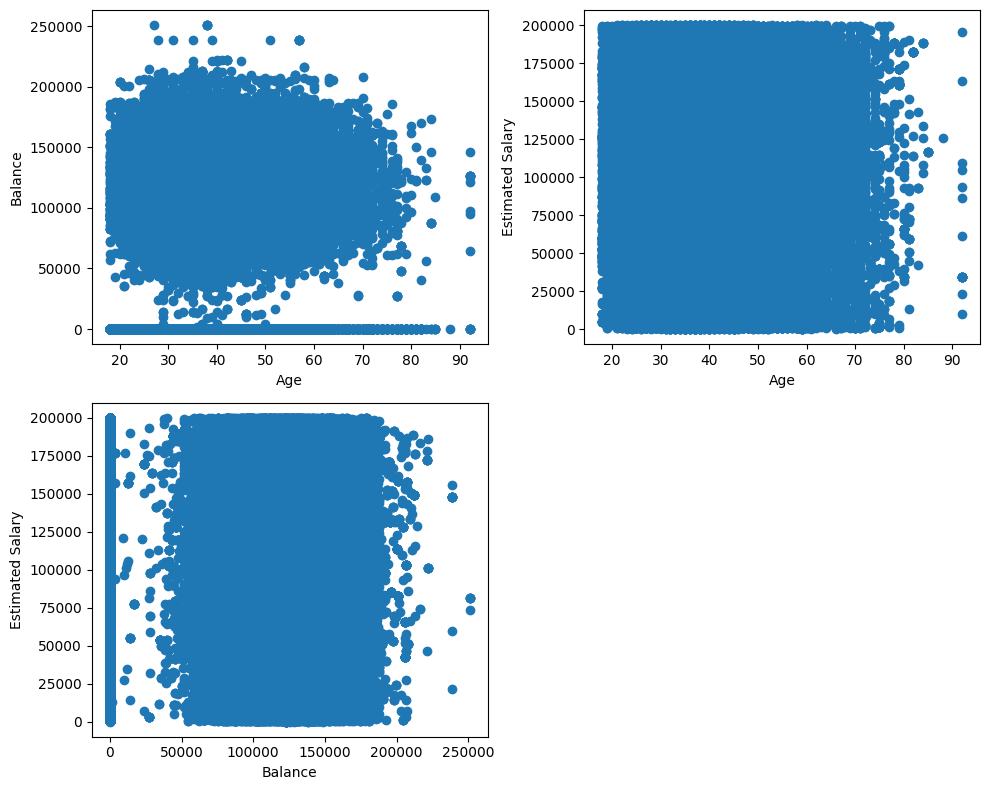

In [52]:
#We need to drop the string columns and binary columns to get a better understanding of the data

data = data.drop(['Geography', "Gender"], axis=1)


import matplotlib.pyplot as plt

# Find medians
medians = data.median()
print("\nMedians:")
print(medians)

# Create histograms
data.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

# Create scatter plots
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.scatter(data['Age'], data['Balance'])
plt.xlabel('Age')
plt.ylabel('Balance')

plt.subplot(2, 2, 2)
plt.scatter(data['Age'], data['EstimatedSalary'])
plt.xlabel('Age')
plt.ylabel('Estimated Salary')

plt.subplot(2, 2, 3)
plt.scatter(data['Balance'], data['EstimatedSalary'])
plt.xlabel('Balance')
plt.ylabel('Estimated Salary')

plt.tight_layout()
plt.show()


Medians:
CreditScore           659.00
Age                    38.00
Balance            122318.50
NumOfProducts           1.00
HasCrCard               1.00
EstimatedSalary    117841.07
dtype: float64


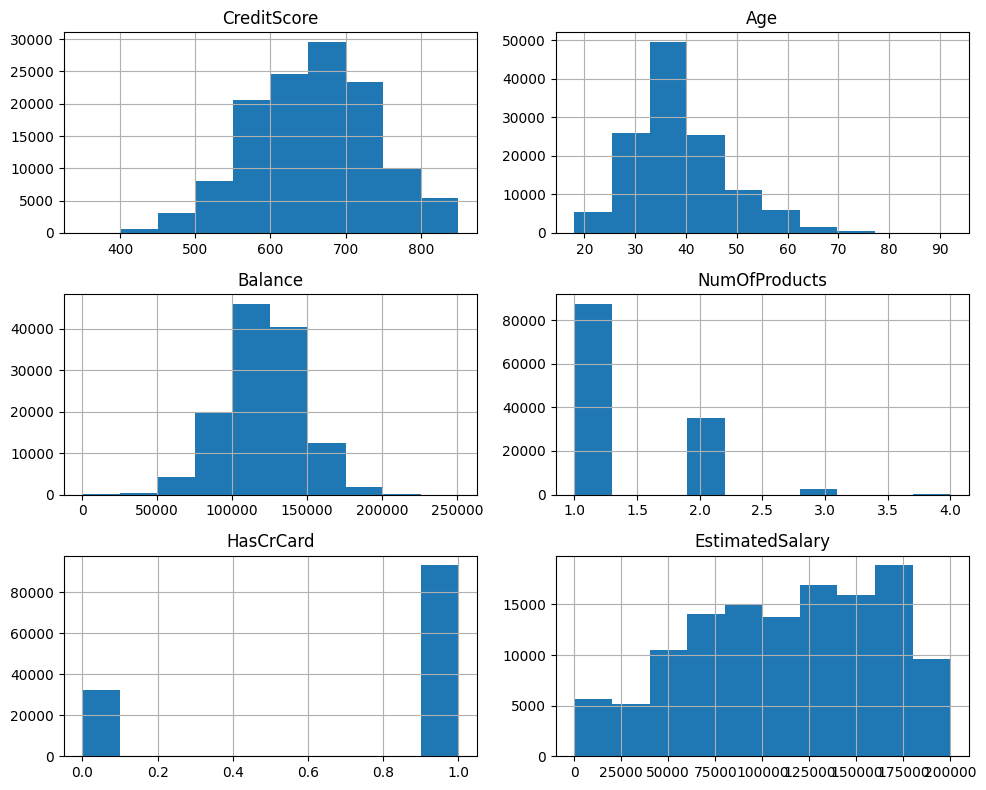

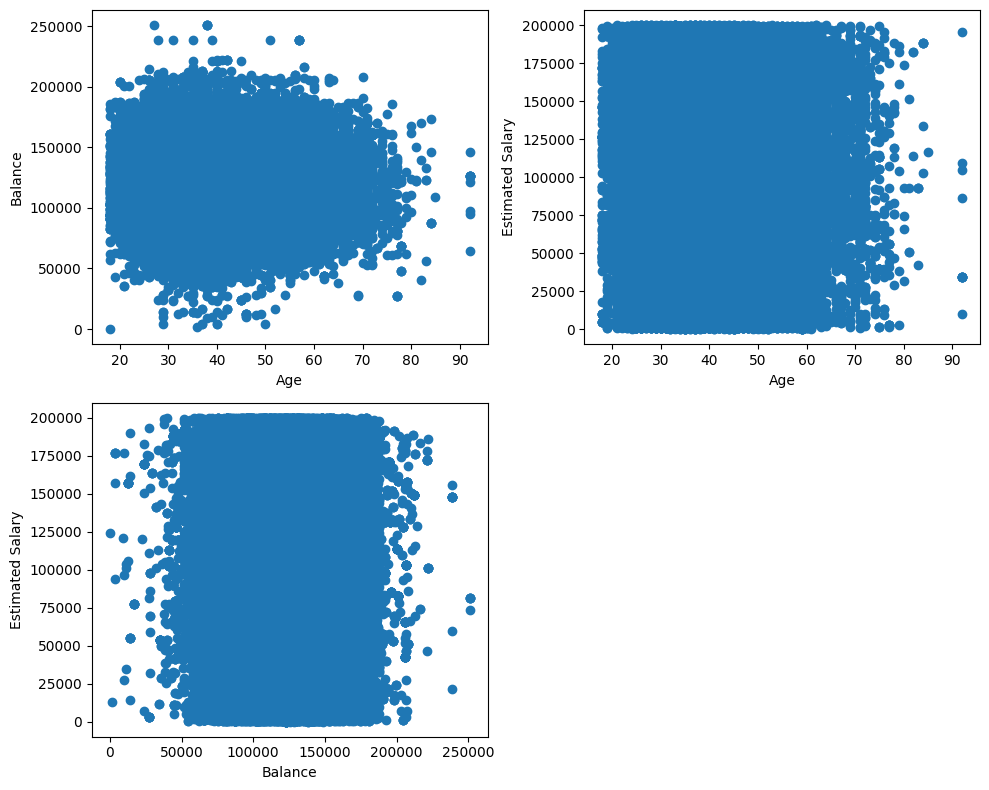

In [53]:
# The pltos show that we have an issue with ballance, a lot of the accounts are zero. This would scew our data, so we need to remove the rows with zero balance

data = data[data['Balance'] > 0]


# Find medians
medians = data.median()
print("\nMedians:")
print(medians)

# Create histograms
data.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

# Create scatter plots
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.scatter(data['Age'], data['Balance'])
plt.xlabel('Age')
plt.ylabel('Balance')

plt.subplot(2, 2, 2)
plt.scatter(data['Age'], data['EstimatedSalary'])
plt.xlabel('Age')
plt.ylabel('Estimated Salary')

plt.subplot(2, 2, 3)
plt.scatter(data['Balance'], data['EstimatedSalary'])
plt.xlabel('Balance')
plt.ylabel('Estimated Salary')

plt.tight_layout()
plt.show()

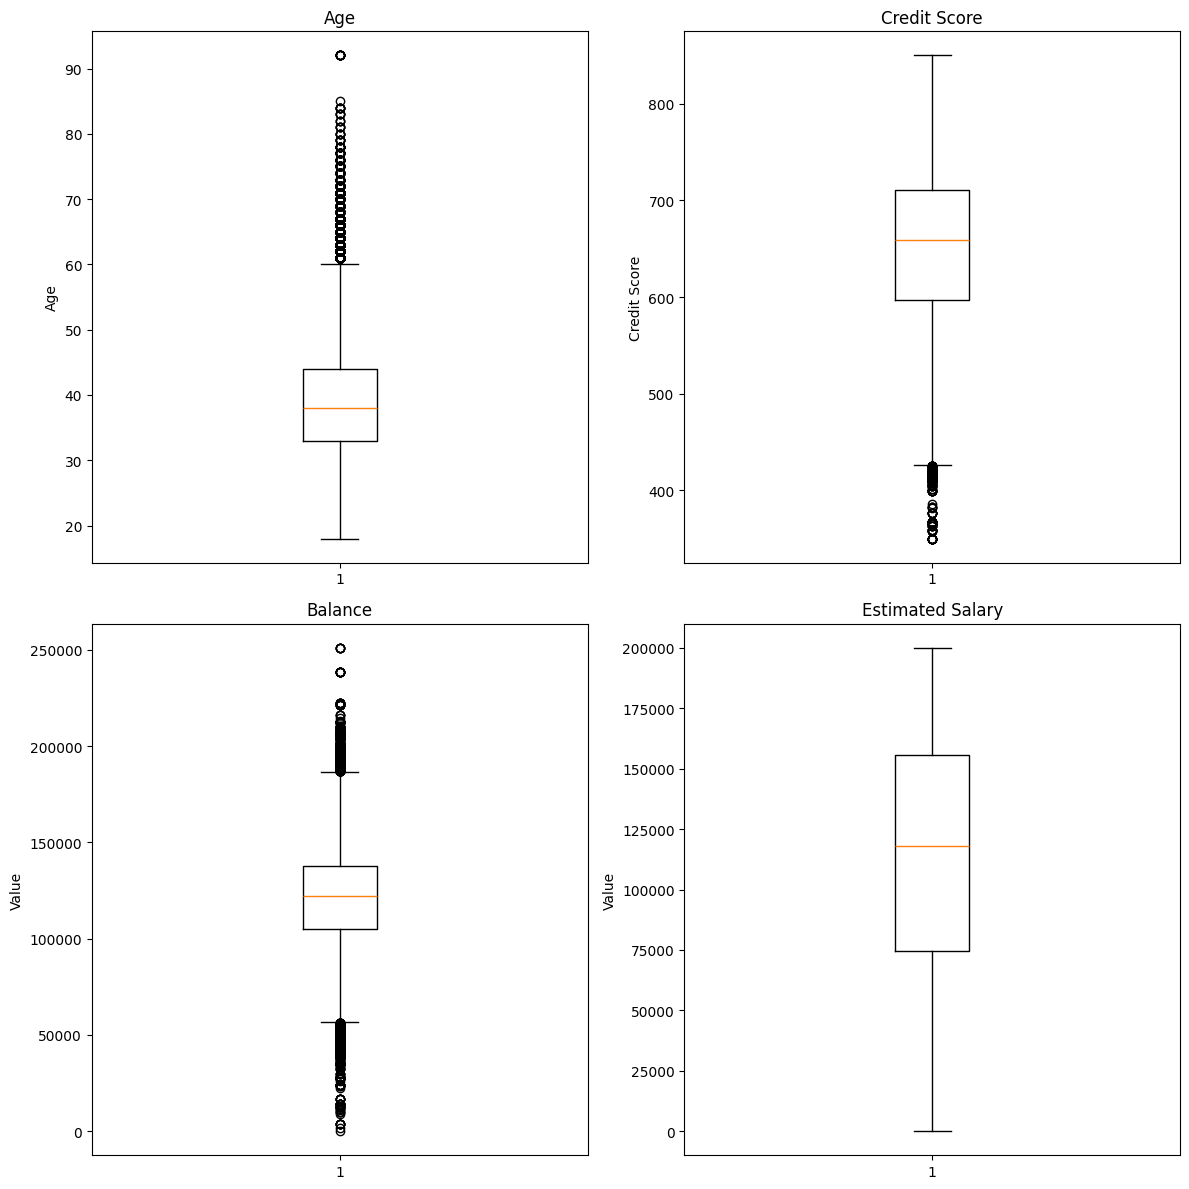

In [54]:
# The data looks better now, we can proceed to the next step

# Plot box plots to visualize outliers
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.boxplot(data['Age'])
plt.title('Age')
plt.ylabel('Age')

plt.subplot(2, 2, 2)
plt.boxplot(data['CreditScore'])
plt.title('Credit Score')
plt.ylabel('Credit Score')

plt.subplot(2, 2, 3)
plt.boxplot(data['Balance'])
plt.title('Balance')
plt.ylabel('Value')

plt.subplot(2, 2, 4)
plt.boxplot(data['EstimatedSalary'])
plt.title('Estimated Salary')
plt.ylabel('Value')


plt.tight_layout()
plt.show()

In [55]:
data

,CreditScore,Age,Balance,NumOfProducts,HasCrCard,EstimatedSalary
3,581,34.0,148882.54,1,1.0,84560.88
5,588,36.0,131778.58,1,1.0,136024.31
6,593,30.0,144772.69,1,1.0,29792.11
7,678,37.0,138476.41,1,1.0,106851.60
9,583,40.0,81274.33,1,1.0,170843.07
...,...,...,...,...,...,...
275048,752,32.0,160729.10,1,1.0,142223.94
275049,667,43.0,83765.35,1,1.0,118358.54
275052,570,29.0,116099.82,1,1.0,148087.62
275053,575,36.0,178032.53,1,1.0,42181.68
